In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data.txt")

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df = df[(df['Target'] == 'Graduate') | (df['Target'] == 'Dropout')]

In [5]:
df['Target'] = df['Target'].map({'Dropout': 0, 'Graduate': 1})

In [6]:
df.reset_index(inplace=True)

In [7]:
df.drop('index',inplace=True,axis=1)

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('Target',axis=1)
y = df['Target']

In [12]:
scaler = MinMaxScaler()

In [13]:
X_transform = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=101)

In [15]:
bestfeatures = SelectKBest(score_func=chi2, k=10)

In [16]:
fit = bestfeatures.fit(X_transform,y)

In [17]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [18]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [19]:
featureScores.columns = ['Specs','Score']

In [20]:
print(featureScores.sort_values(ascending=False,by='Score'))

                                             Specs       Score
18                              Scholarship holder  260.724932
15                                          Debtor  229.692794
31                Curricular units 2nd sem (grade)  214.399992
30             Curricular units 2nd sem (approved)  171.768316
17                                          Gender  151.148802
25                Curricular units 1st sem (grade)  126.200550
16                         Tuition fees up to date   95.006019
24             Curricular units 1st sem (approved)   94.028043
1                                 Application mode   67.006863
19                               Age at enrollment   46.373536
13                                       Displaced   26.035663
0                                   Marital status   14.941084
32  Curricular units 2nd sem (without evaluations)   12.540434
5                           Previous qualification    9.547234
26  Curricular units 1st sem (without evaluations)    6

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

Text(0, 0.5, 'Accuracy Score')

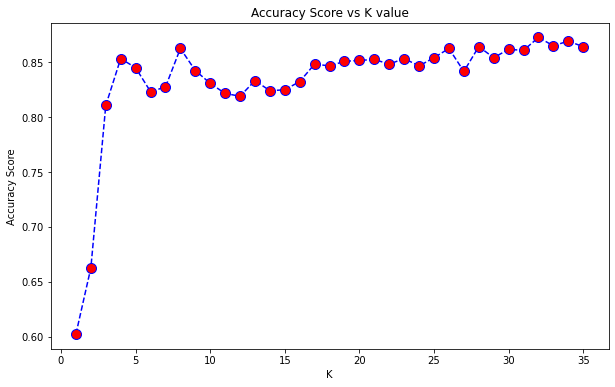

In [22]:
accuracy = []
for i in range(1,36):
    X_new = SelectKBest(chi2, k=i).fit_transform(X_transform, y)
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=101)
    new_model = DecisionTreeClassifier()
    new_model.fit(X_train,y_train)
    predictions = new_model.predict(X_test)
    accuracy.append(accuracy_score(y_test,predictions))
plt.figure(figsize=(10,6))
plt.plot(range(1,36),accuracy,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy Score vs K value')
plt.xlabel('K')
plt.ylabel('Accuracy Score')

In [23]:
pd.DataFrame(range(1,36),accuracy)

,0
0.602671,1
0.662771,2
0.810518,3
0.853088,4
0.844741,5
0.823038,6
0.827212,7
0.862270,8
0.842237,9
0.830551,10


In [24]:
X_new = SelectKBest(chi2, k=8).fit_transform(X_transform, y)

In [25]:
X_new.shape

(3630, 8)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=101)

# Buidling Model After Feature Selection

### Logistic Regression

In [27]:
logmodel = LogisticRegression(max_iter=10000)

In [28]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [29]:
predictions = logmodel.predict(X_test)

In [30]:
print("Accuracy: ", accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.8746556473829201


              precision    recall  f1-score   support

           0       0.90      0.77      0.83       289
           1       0.86      0.94      0.90       437

    accuracy                           0.87       726
   macro avg       0.88      0.86      0.87       726
weighted avg       0.88      0.87      0.87       726



[[223  66]
 [ 25 412]]


### KNN

In [31]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

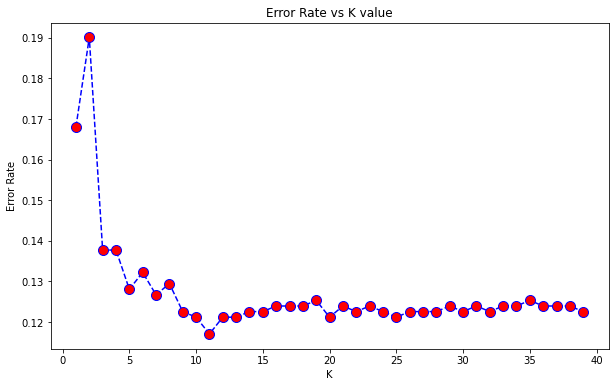

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [70]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [71]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.8829201101928374


              precision    recall  f1-score   support

           0       0.88      0.82      0.85       289
           1       0.89      0.92      0.90       437

    accuracy                           0.88       726
   macro avg       0.88      0.87      0.88       726
weighted avg       0.88      0.88      0.88       726



[[237  52]
 [ 33 404]]


### Decision Tree

In [35]:
dtree = DecisionTreeClassifier()

In [36]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
predictions = dtree.predict(X_test)

In [38]:
print("Accuracy: ", accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.8415977961432507


              precision    recall  f1-score   support

           0       0.79      0.81      0.80       289
           1       0.87      0.86      0.87       437

    accuracy                           0.84       726
   macro avg       0.83      0.84      0.84       726
weighted avg       0.84      0.84      0.84       726



[[235  54]
 [ 61 376]]


### Random Forest

In [39]:
rfc = RandomForestClassifier(n_estimators=200)

In [40]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [41]:
predictions = rfc.predict(X_test)

In [42]:
print("Accuracy: ", accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.8732782369146006


              precision    recall  f1-score   support

           0       0.84      0.84      0.84       289
           1       0.89      0.89      0.89       437

    accuracy                           0.87       726
   macro avg       0.87      0.87      0.87       726
weighted avg       0.87      0.87      0.87       726



[[243  46]
 [ 46 391]]


### Support Vector Machine

In [43]:
model = SVC()

In [44]:
model.fit(X_train,y_train)

SVC()

In [45]:
predictions = model.predict(X_test)

In [46]:
print("Accuracy: ", accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.8732782369146006


              precision    recall  f1-score   support

           0       0.88      0.79      0.83       289
           1       0.87      0.93      0.90       437

    accuracy                           0.87       726
   macro avg       0.88      0.86      0.86       726
weighted avg       0.87      0.87      0.87       726



[[227  62]
 [ 30 407]]


### Grid Search CV

In [47]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [48]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [49]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .................................C=0.1, gamma=1; total time=   0.1s
[CV 2/5] END .................................C=0.1, gamma=1; total time=   0.1s
[CV 3/5] END .................................C=0.1, gamma=1; total time=   0.1s
[CV 4/5] END .................................C=0.1, gamma=1; total time=   0.1s
[CV 5/5] END .................................C=0.1, gamma=1; total time=   0.0s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=   0.1s
[CV 2/5] END ...............................C=0.1, gamma=0.1; total time=   0.1s
[CV 3/5] END ...............................C=0.1, gamma=0.1; total time=   0.1s
[CV 4/5] END ...............................C=0.1, gamma=0.1; total time=   0.1s
[CV 5/5] END ...............................C=0.1, gamma=0.1; total time=   0.1s
[CV 1/5] END ..............................C=0.1, gamma=0.01; total time=   0.2s
[CV 2/5] END ..............................C=0.

[CV 2/5] END ................................C=1000, gamma=1; total time=   0.4s
[CV 3/5] END ................................C=1000, gamma=1; total time=   0.2s
[CV 4/5] END ................................C=1000, gamma=1; total time=   0.3s
[CV 5/5] END ................................C=1000, gamma=1; total time=   0.4s
[CV 1/5] END ..............................C=1000, gamma=0.1; total time=   0.1s
[CV 2/5] END ..............................C=1000, gamma=0.1; total time=   0.1s
[CV 3/5] END ..............................C=1000, gamma=0.1; total time=   0.1s
[CV 4/5] END ..............................C=1000, gamma=0.1; total time=   0.1s
[CV 5/5] END ..............................C=1000, gamma=0.1; total time=   0.1s
[CV 1/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 2/5] END .............................C=1000, gamma=0.01; total time=   0.1s
[CV 3/5] END .............................C=1000, gamma=0.01; total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [50]:
grid.best_estimator_

SVC(C=10, gamma=1)

In [51]:
grid.best_params_

{'C': 10, 'gamma': 1}

In [52]:
grid.best_score_

0.8867101905157575

In [53]:
predictions = grid.predict(X_test)

In [54]:
print("Accuracy: ", accuracy_score(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.8774104683195593


              precision    recall  f1-score   support

           0       0.88      0.81      0.84       289
           1       0.88      0.92      0.90       437

    accuracy                           0.88       726
   macro avg       0.88      0.87      0.87       726
weighted avg       0.88      0.88      0.88       726



[[233  56]
 [ 33 404]]


### Naive Bayes

In [55]:
gnb = GaussianNB()

In [56]:
gnb.fit(X_train,y_train)

GaussianNB()

In [57]:
predictions = gnb.predict(X_test)

In [58]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.8484848484848485


              precision    recall  f1-score   support

           0       0.86      0.74      0.79       289
           1       0.84      0.92      0.88       437

    accuracy                           0.85       726
   macro avg       0.85      0.83      0.84       726
weighted avg       0.85      0.85      0.85       726



[[213  76]
 [ 34 403]]


### XGBoost

In [59]:
xgb_cl = xgb.XGBClassifier()

In [60]:
xgb_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [61]:
predictions = xgb_cl.predict(X_test)

In [62]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.8705234159779615


              precision    recall  f1-score   support

           0       0.84      0.83      0.84       289
           1       0.89      0.90      0.89       437

    accuracy                           0.87       726
   macro avg       0.87      0.86      0.86       726
weighted avg       0.87      0.87      0.87       726



[[240  49]
 [ 45 392]]


### Neural Network

In [63]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
model = Sequential()

# input layer
model.add(Dense(units=36,activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(units=18,activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# compiler
model.compile(loss='binary_crossentropy', optimizer='adam')

In [65]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [66]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
91/91 [==============================] - 1s 2ms/step - loss: 0.6185 - val_loss: 0.5582
Epoch 2/600
91/91 [==============================] - 0s 1ms/step - loss: 0.5456 - val_loss: 0.4677
Epoch 3/600
91/91 [==============================] - 0s 1ms/step - loss: 0.4852 - val_loss: 0.4106
Epoch 4/600
91/91 [==============================] - 0s 1ms/step - loss: 0.4588 - val_loss: 0.3887
Epoch 5/600
91/91 [==============================] - 0s 1ms/step - loss: 0.4362 - val_loss: 0.3713
Epoch 6/600
91/91 [==============================] - 0s 1ms/step - loss: 0.4257 - val_loss: 0.3611
Epoch 7/600
91/91 [==============================] - 0s 1ms/step - loss: 0.4109 - val_loss: 0.3594
Epoch 8/600
91/91 [==============================] - 0s 1ms/step - loss: 0.4056 - val_loss: 0.3479
Epoch 9/600
91/91 [==============================] - 0s 1ms/step - loss: 0.4018 - val_loss: 0.3468
Epoch 10/600
91/91 [==============================] - 0s 1ms/step - loss: 0.3881 - val_loss: 0.3393
Epoch 11/

91/91 [==============================] - 0s 1ms/step - loss: 0.3182 - val_loss: 0.3075
Epoch 84/600
91/91 [==============================] - 0s 1ms/step - loss: 0.3259 - val_loss: 0.3061
Epoch 85/600
91/91 [==============================] - 0s 1ms/step - loss: 0.3196 - val_loss: 0.3040
Epoch 86/600
91/91 [==============================] - 0s 1ms/step - loss: 0.3120 - val_loss: 0.3034
Epoch 87/600
91/91 [==============================] - 0s 1ms/step - loss: 0.3242 - val_loss: 0.3056
Epoch 88/600
91/91 [==============================] - 0s 1ms/step - loss: 0.3163 - val_loss: 0.3066
Epoch 89/600
91/91 [==============================] - 0s 1ms/step - loss: 0.3176 - val_loss: 0.3051
Epoch 90/600
91/91 [==============================] - 0s 1ms/step - loss: 0.3184 - val_loss: 0.3052
Epoch 91/600
91/91 [==============================] - 0s 1ms/step - loss: 0.3202 - val_loss: 0.3064
Epoch 92/600
91/91 [==============================] - 0s 1ms/step - loss: 0.3197 - val_loss: 0.3040
Epoch 93/600


<AxesSubplot:>

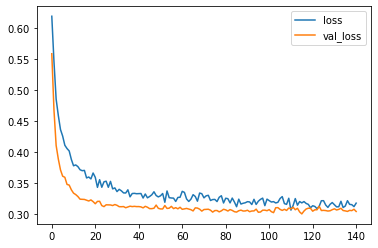

In [67]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [68]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [69]:
print('Accuracy Score:',accuracy_score(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

Accuracy Score: 0.8815426997245179


              precision    recall  f1-score   support

           0       0.86      0.83      0.85       289
           1       0.89      0.91      0.90       437

    accuracy                           0.88       726
   macro avg       0.88      0.87      0.88       726
weighted avg       0.88      0.88      0.88       726



[[241  48]
 [ 38 399]]
